In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [10]:
Scores = []
AdjR2 = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5


for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    Scores.append(Ridge_A_Score)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)

In [11]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [12]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [13]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)

In [14]:
R2vAR2

,R_Squared,Adjusted_R2
0,0.919898,0.909433
1,0.887533,0.872840
2,0.914304,0.903108
3,0.915683,0.904668
4,0.915000,0.903896
...,...,...
95,0.932118,0.923250
96,0.865971,0.848461
97,0.928709,0.919395
98,0.914273,0.903074


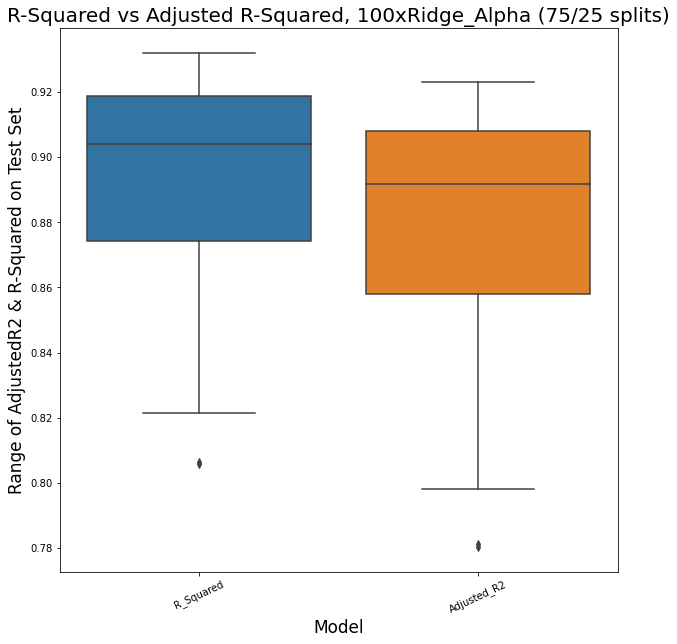

In [15]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRidge_Alpha (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [16]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [17]:
#df = pd.DataFrame(Positive, columns=['Ridge(Alpha)'])
R2vAR2.to_csv('Ridge(Alpha)_R2vAR2.csv', index=False)

In [18]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [19]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.919898,0.909433,0.010465
1,0.887533,0.872840,0.014693
2,0.914304,0.903108,0.011196
3,0.915683,0.904668,0.011015
4,0.915000,0.903896,0.011105
...,...,...,...
95,0.932118,0.923250,0.008868
96,0.865971,0.848461,0.017510
97,0.928709,0.919395,0.009314
98,0.914273,0.903074,0.011200


In [20]:
R2vAR2.Difference.mean()

0.013638705568797222

In [21]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.895604,0.881966,0.013639
std,0.029064,0.032862,0.003797
min,0.805701,0.780317,0.008868
25%,0.874398,0.857989,0.010611
50%,0.904182,0.891663,0.012518
75%,0.918782,0.908171,0.016409
max,0.932118,0.923250,0.025384
